In [18]:
pip freeze > model_requirements.txt    

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data_train_df = pd.read_csv("data_train_csv")
data_smauto_train_df = pd.read_csv("data_smauto_train_csv")
data_smin_train_df = pd.read_csv("data_smin_train_csv")

data_test_df = pd.read_csv("data_test_csv")
data_val_df = pd.read_csv("data_val_csv")

In [21]:
print(f'Data_train: {data_train_df.shape}, Data smauto: {data_smauto_train_df.shape}, Data smin: {data_smin_train_df.shape}')

Data_train: (192638, 10), Data smauto: (293598, 10), Data smin: (288041, 10)


In [22]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [23]:
print(data_train_df['Winner_num'].value_counts())
print(data_smauto_train_df['Winner_num'].value_counts())
print(data_smin_train_df['Winner_num'].value_counts())

Winner_num
0    97866
2    92309
1     2463
Name: count, dtype: int64
Winner_num
0    97866
2    97866
1    97866
Name: count, dtype: int64
Winner_num
0    97866
1    97866
2    92309
Name: count, dtype: int64


Random Forest model

Train the baseline RF classifier

NOTE: Should I turn this into a function to call here and at the end?

In [24]:
#Original code

    rnd_clf = RandomForestClassifier(random_state=7)
    rnd_clf.fit(X_train, y_train)

    rnd_clf_train_score = rnd_clf.score(X_train, y_train)
    rnd_clf_test_score = rnd_clf.score(X_test, y_test)
    print("Training score:", rnd_clf_train_score)
    print("Testing score:", rnd_clf_test_score)

    y_pred_rf = rnd_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_rf, labels=rnd_clf.classes_)
    cm_norm = confusion_matrix(y_test, y_pred_rf, labels=rnd_clf.classes_, normalize='true')
    cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['1', '2', '3'])

    cmd.plot()
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

    print(classification_report(y_test, y_pred_rf))

IndentationError: unexpected indent (3960503144.py, line 3)

In [25]:
def rf(train_data, test_data, val_data, sample, proportion):
    #own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
    from data_formatting import data_format
    X_train, X_test, X_val, y_train, y_test, y_val = data_format(train_data, test_data, val_data, sample, proportion)

    rnd_clf = RandomForestClassifier(random_state=7)
    rnd_clf.fit(X_train, y_train)

    rnd_clf_train_score = rnd_clf.score(X_train, y_train)
    rnd_clf_test_score = rnd_clf.score(X_test, y_test)
    print(f"Training score: {rnd_clf_train_score}, Testing score: {rnd_clf_test_score}" )

    y_pred = rnd_clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=rnd_clf.classes_)
    cm_norm = confusion_matrix(y_test, y_pred, labels=rnd_clf.classes_, normalize='true')
    cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['0', '1', '2'])

    cmd.plot()
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

    print(classification_report(y_test, y_pred))

Training score: 0.9700007267517312
Testing score: 0.9265043298053438


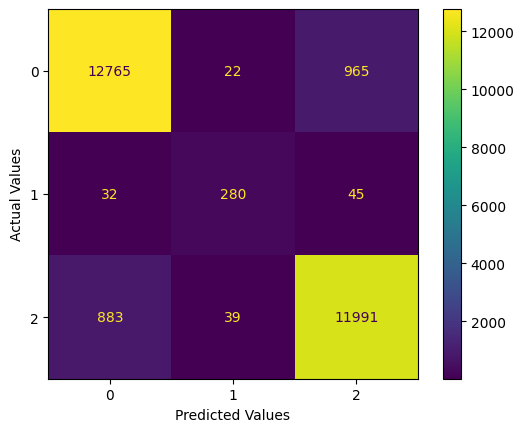

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     13752
           1       0.82      0.78      0.80       357
           2       0.92      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.89      0.88      0.89     27022
weighted avg       0.93      0.93      0.93     27022



In [26]:
rf(data_train_df, data_test_df, data_val_df, None, None)

Training score: 0.9803098113747369
Testing score: 0.9293168529346458


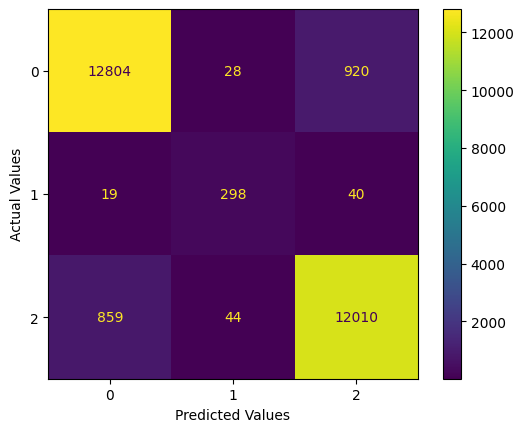

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13752
           1       0.81      0.83      0.82       357
           2       0.93      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.89      0.90      0.89     27022
weighted avg       0.93      0.93      0.93     27022



In [27]:
rf(data_smauto_train_df, data_test_df, data_val_df, None, None)

Training score: 0.9799334122572828
Testing score: 0.9297979424172896


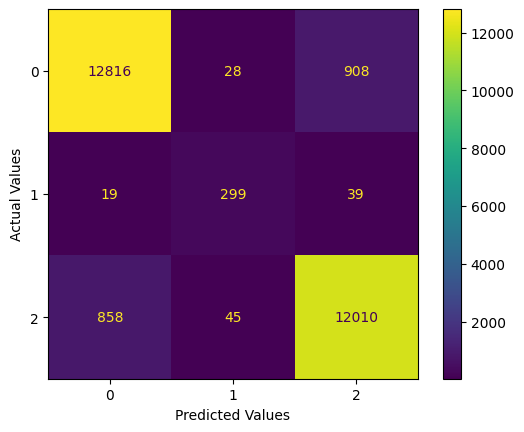

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13752
           1       0.80      0.84      0.82       357
           2       0.93      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.89      0.90      0.89     27022
weighted avg       0.93      0.93      0.93     27022



In [28]:
rf(data_smin_train_df, data_test_df, data_val_df, None, None)

Using min because recall is the more importantmetric in this case. Recall is the number of true positives/ true positives + False negatives.  I.e. out of the number of times it was actually positive, how many times did we predict it to be so.  Not as much of a concern for false negatives in category 1 because it has less impact than incorrectly giving the win to another team.

Tune the RF model

1 n_estimators, Train Accuracy: 0.9658416683735996, Validation Accuracy: 0.8964011471921547
6 n_estimators, Train Accuracy: 0.9787807985668707, Validation Accuracy: 0.9270052733832918
11 n_estimators, Train Accuracy: 0.9795515221791342, Validation Accuracy: 0.9296142103802387
16 n_estimators, Train Accuracy: 0.9797563541301412, Validation Accuracy: 0.9304653529466186
21 n_estimators, Train Accuracy: 0.9798257886898045, Validation Accuracy: 0.9310204459246924
26 n_estimators, Train Accuracy: 0.9798605059696363, Validation Accuracy: 0.9310204459246924
31 n_estimators, Train Accuracy: 0.9798882797935016, Validation Accuracy: 0.931242483115922
36 n_estimators, Train Accuracy: 0.979895223249468, Validation Accuracy: 0.9315940420020353
41 n_estimators, Train Accuracy: 0.9799056384334175, Validation Accuracy: 0.9315015265056897
46 n_estimators, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9315755389027662
51 n_estimators, Train Accuracy: 0.9799195253453501, Validation Accuracy: 0

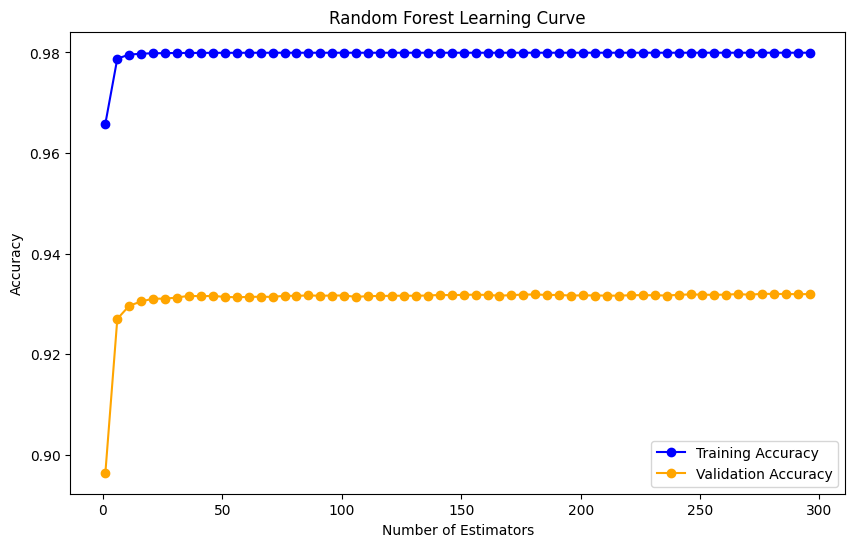

In [40]:
best_accuracy = 0
estimators = []
train_acc_list = []
val_acc_list = []
for e in range(1,300, 5):
    estimators.append(e)

    model = RandomForestClassifier(n_estimators=e, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{e} n_estimators, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_estimators = e
    
estimators_df = pd.DataFrame({'Estimators': estimators,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

print(f"Best accuracy is: {best_accuracy} and estimators is {best_estimators}")

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.plot(estimators_df['Estimators'], estimators_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(estimators_df['Estimators'], estimators_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [29]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40 ,50, 60, 70, 80, 90, 100],
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_terminal_nodes': [0, 5, 10, 50, 100],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9],
    }

In [31]:
X_train, X_test, X_val, y_train, y_test, y_val = data_format(data_smin_train_df, data_test_df, data_val_df, None, None)

10 max depth, Train Accuracy: 0.8493478358983617, Validation Accuracy: 0.7758719585530577
20 max depth, Train Accuracy: 0.9767845549765485, Validation Accuracy: 0.9394393560921455
30 max depth, Train Accuracy: 0.9798882797935016, Validation Accuracy: 0.9319085946896105
40 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9316125451013044
50 max depth, Train Accuracy: 0.979916053617367, Validation Accuracy: 0.9314275141086132
Best accuracy is: 0.9314460172078823 and estimators is 40


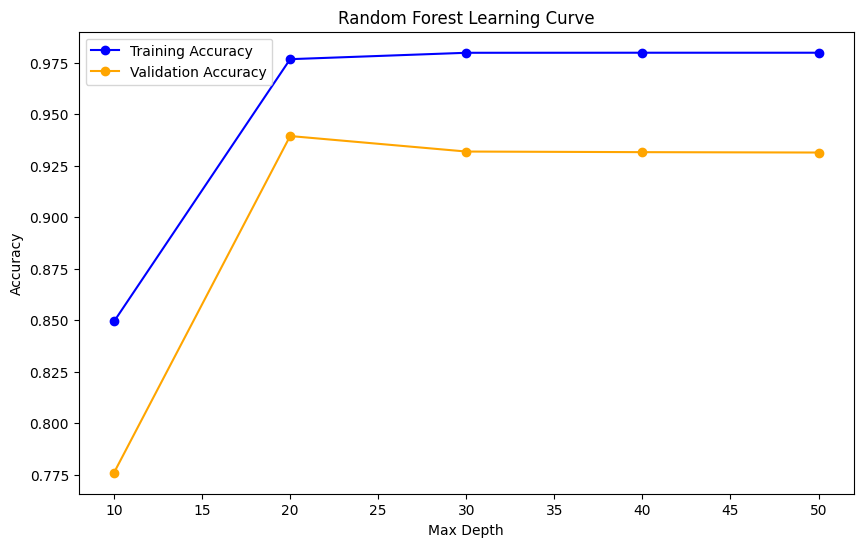

In [41]:
best_accuracy = 0
depth_list = []
train_acc_list = []
val_acc_list = []
for md in param_grid['max_depth']:
    depth_list.append(md)

    model = RandomForestClassifier(n_estimators=50, max_depth=md, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{md} max depth, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_depth= md
    
depth_df = pd.DataFrame({'Max Depth': depth_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.plot(depth_df['Max Depth'], depth_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(depth_df['Max Depth'], depth_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

15 max depth, Train Accuracy: 0.945705646071219, Validation Accuracy: 0.9097048755666575
16 max depth, Train Accuracy: 0.9563187185157669, Validation Accuracy: 0.9234526783236192
17 max depth, Train Accuracy: 0.964248145229325, Validation Accuracy: 0.9320196132852253
18 max depth, Train Accuracy: 0.9705979357105412, Validation Accuracy: 0.938366176334536
19 max depth, Train Accuracy: 0.9746702726347986, Validation Accuracy: 0.9406420575446387
20 max depth, Train Accuracy: 0.9767845549765485, Validation Accuracy: 0.9394393560921455
21 max depth, Train Accuracy: 0.9782426807294795, Validation Accuracy: 0.9378110833564622
22 max depth, Train Accuracy: 0.9789196676861974, Validation Accuracy: 0.9363493385142011
23 max depth, Train Accuracy: 0.9792841991244302, Validation Accuracy: 0.9352391525580535
24 max depth, Train Accuracy: 0.9795306918112352, Validation Accuracy: 0.9341844758997132
Best accuracy is: 0.9314460172078823 and estimators is 24


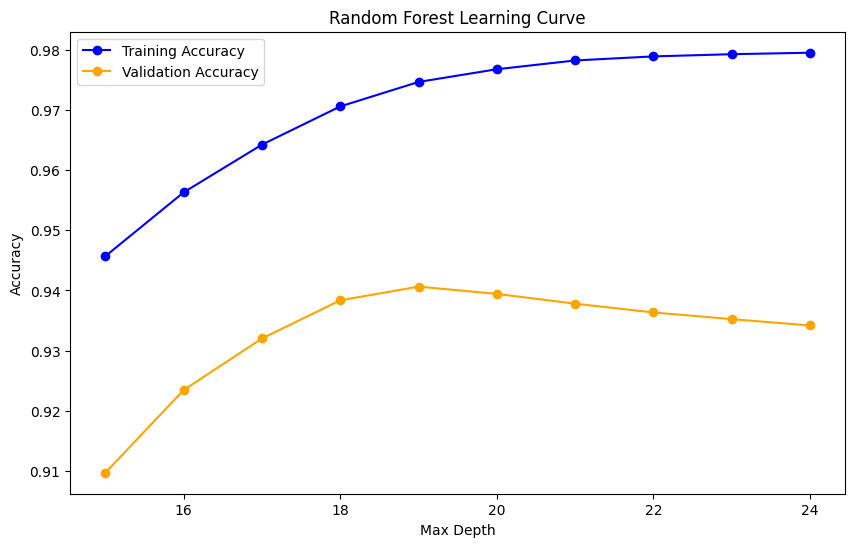

In [42]:
best_accuracy = 0
depth_list = []
train_acc_list = []
val_acc_list = []
for md in range(15, 25):
    depth_list.append(md)

    model = RandomForestClassifier(n_estimators=50, max_depth=md, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{md} max depth, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_depth= md
    
depth_df = pd.DataFrame({'Max Depth': depth_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.plot(depth_df['Max Depth'], depth_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(depth_df['Max Depth'], depth_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [ ]:
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_terminal_nodes': [0, 5, 10, 50, 100],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9],
    }

1 max features, Train Accuracy: 0.9677684774042584, Validation Accuracy: 0.9246923859746508
2 max features, Train Accuracy: 0.9746702726347986, Validation Accuracy: 0.9406420575446387
3 max features, Train Accuracy: 0.9754757135268938, Validation Accuracy: 0.9426959015635119
4 max features, Train Accuracy: 0.9758784339729414, Validation Accuracy: 0.9420482930890924
5 max features, Train Accuracy: 0.9757708104054631, Validation Accuracy: 0.9423073364788602
6 max features, Train Accuracy: 0.9748542742179065, Validation Accuracy: 0.9423628457766676
7 max features, Train Accuracy: 0.9730107866588437, Validation Accuracy: 0.940975113331483
8 max features, Train Accuracy: 0.9620609565999285, Validation Accuracy: 0.92894809880655


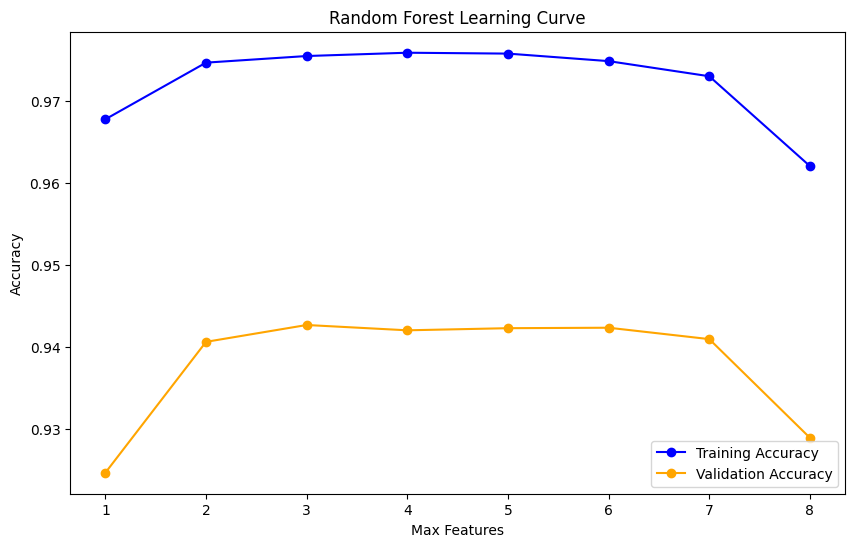

In [43]:
best_accuracy = 0
maxfeatures_list = []
train_acc_list = []
val_acc_list = []
for mf in range(1,9):
    maxfeatures_list.append(mf)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=mf,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mf} max features, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_maxfeatures= mf
    
mf_df = pd.DataFrame({'Max Features': maxfeatures_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.plot(mf_df['Max Features'], mf_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mf_df['Max Features'], mf_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [45]:
param_grid = {'min_samples_split': [10, 50, 100, 200],
    'max_leaf_nodes': [0, 5, 10, 50, 100],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9],
    }

10 min sample, Train Accuracy: 0.9733475442732111, Validation Accuracy: 0.9447867517809233
50 min sample, Train Accuracy: 0.9608979277255668, Validation Accuracy: 0.9342399851975206
100 min sample, Train Accuracy: 0.9439524234397186, Validation Accuracy: 0.9114256637986863
200 min sample, Train Accuracy: 0.9196781013814006, Validation Accuracy: 0.8786381718937922


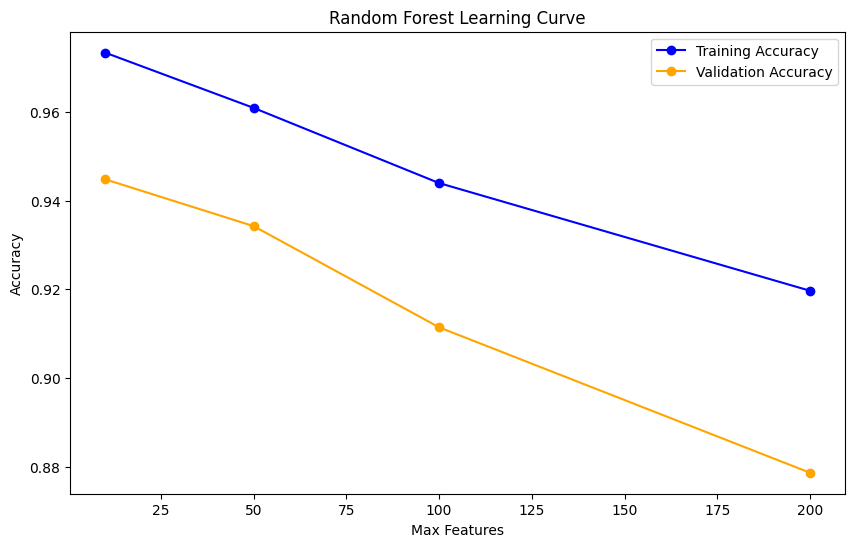

In [46]:
best_accuracy = 0
mss_list = []
train_acc_list = []
val_acc_list = []
for mss in param_grid['min_samples_split']:
    mss_list.append(mss)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=mss,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mss} min sample, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_mss= mss
    
mss_df = pd.DataFrame({'Min Samples Split': mss_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.plot(mss_df['Min Samples Split'], mss_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mss_df['Min Samples Split'], mss_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

2 min sample, Train Accuracy: 0.9754757135268938, Validation Accuracy: 0.9426959015635119
3 min sample, Train Accuracy: 0.9750521627129471, Validation Accuracy: 0.9428439263576649
4 min sample, Train Accuracy: 0.9750556344409302, Validation Accuracy: 0.9425293736700897
5 min sample, Train Accuracy: 0.9751458993684927, Validation Accuracy: 0.943880099916736
6 min sample, Train Accuracy: 0.9744376668599262, Validation Accuracy: 0.944028124710889
7 min sample, Train Accuracy: 0.9741321547974073, Validation Accuracy: 0.9438986030160051
8 min sample, Train Accuracy: 0.9747605375623609, Validation Accuracy: 0.9453603478582663
9 min sample, Train Accuracy: 0.9736461128797637, Validation Accuracy: 0.9452493292626515
10 min sample, Train Accuracy: 0.9733475442732111, Validation Accuracy: 0.9447867517809233
11 min sample, Train Accuracy: 0.9733544877291774, Validation Accuracy: 0.9453418447589972
12 min sample, Train Accuracy: 0.9728545588996012, Validation Accuracy: 0.945323341659728
13 min sam

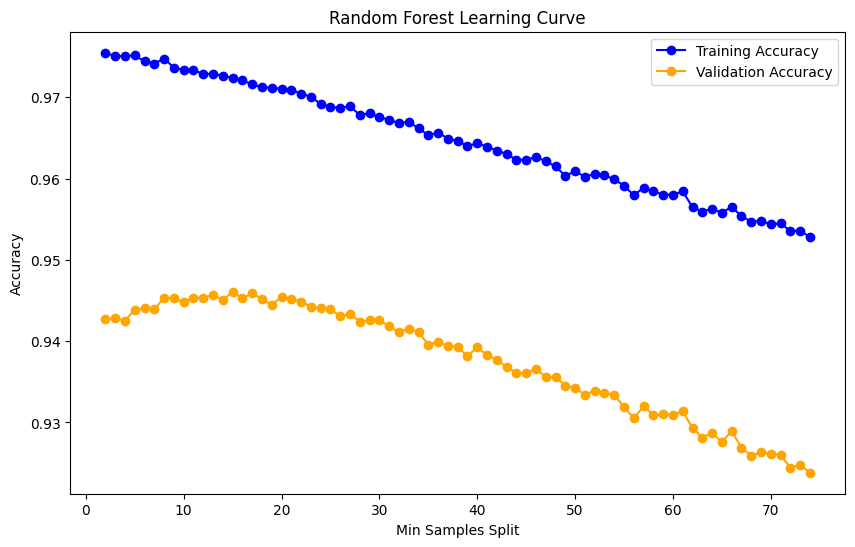

In [48]:
best_accuracy = 0
mss_list = []
train_acc_list = []
val_acc_list = []
for mss in range(2,75):
    mss_list.append(mss)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=mss,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mss} min sample, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_mss= mss
    
mss_df = pd.DataFrame({'Min Samples Split': mss_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.plot(mss_df['Min Samples Split'], mss_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mss_df['Min Samples Split'], mss_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [63]:
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_leaf_nodes': [2, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9],
    }

2 max leaf nodes, Train Accuracy: 0.49405813755680617, Validation Accuracy: 0.688463317605699
100 max leaf nodes, Train Accuracy: 0.8073677011258814, Validation Accuracy: 0.7234526783236193
200 max leaf nodes, Train Accuracy: 0.8347908804649338, Validation Accuracy: 0.7594782126006105
300 max leaf nodes, Train Accuracy: 0.859908832423162, Validation Accuracy: 0.7952632065871034
400 max leaf nodes, Train Accuracy: 0.8756565905548168, Validation Accuracy: 0.8154130816911833
500 max leaf nodes, Train Accuracy: 0.8884880971806097, Validation Accuracy: 0.8333980941807753
600 max leaf nodes, Train Accuracy: 0.8987505250988574, Validation Accuracy: 0.8489962068646498
700 max leaf nodes, Train Accuracy: 0.9063952701177957, Validation Accuracy: 0.8596354889443982
800 max leaf nodes, Train Accuracy: 0.9130366857495982, Validation Accuracy: 0.8686464982884633
900 max leaf nodes, Train Accuracy: 0.9185914505226687, Validation Accuracy: 0.8758257008048849
1000 max leaf nodes, Train Accuracy: 0.9234

3500 max leaf nodes, Train Accuracy: 0.9682510475939189, Validation Accuracy: 0.9422333240817837
3600 max leaf nodes, Train Accuracy: 0.9688551282629904, Validation Accuracy: 0.942714404662781
3700 max leaf nodes, Train Accuracy: 0.9693099246287855, Validation Accuracy: 0.9428069201591267
3800 max leaf nodes, Train Accuracy: 0.9698029100023955, Validation Accuracy: 0.9431584790452401
3900 max leaf nodes, Train Accuracy: 0.9701361958887798, Validation Accuracy: 0.9437320751225831
4000 max leaf nodes, Train Accuracy: 0.9704625383191976, Validation Accuracy: 0.9444721990933481
4100 max leaf nodes, Train Accuracy: 0.9708930325891105, Validation Accuracy: 0.9446387269867703
4200 max leaf nodes, Train Accuracy: 0.9711846577396968, Validation Accuracy: 0.9448792672772689
4300 max leaf nodes, Train Accuracy: 0.9714415656104513, Validation Accuracy: 0.9452493292626515
4400 max leaf nodes, Train Accuracy: 0.9716325106495256, Validation Accuracy: 0.9454528633546119
4500 max leaf nodes, Train Accu

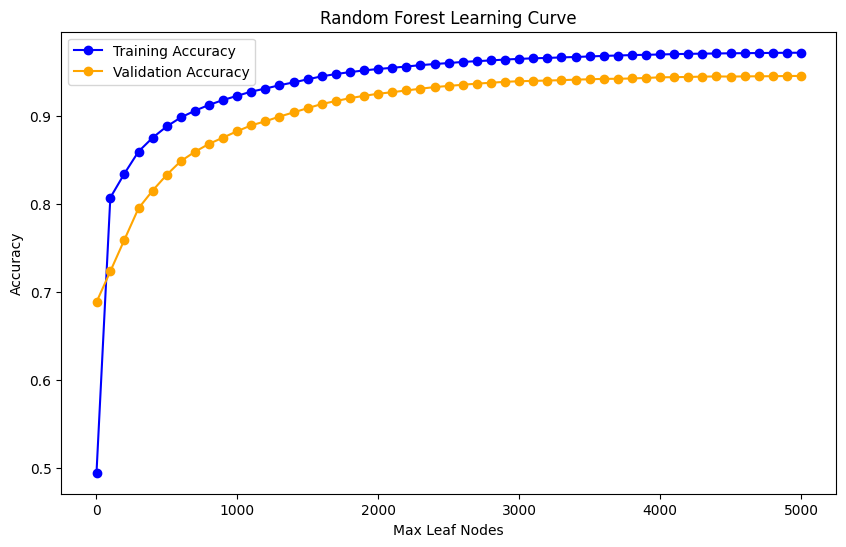

In [64]:
best_accuracy = 0
mln_list = []
train_acc_list = []
val_acc_list = []
for mln in param_grid['max_leaf_nodes']:
    mln_list.append(mln)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=mln, n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{mln} max leaf nodes, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_mln= mln
    
mln_df = pd.DataFrame({'Max Leaf Nodes': mln_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.plot(mln_df['Max Leaf Nodes'], mln_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(mln_df['Max Leaf Nodes'], mln_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [ ]:
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_leaf_nodes': [2, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    }

1 min samples leaf, Train Accuracy: 0.9704625383191976, Validation Accuracy: 0.9444721990933481
100 min samples leaf, Train Accuracy: 0.880322592964196, Validation Accuracy: 0.823350911277639
200 min samples leaf, Train Accuracy: 0.8489937196440784, Validation Accuracy: 0.779406050513461
300 min samples leaf, Train Accuracy: 0.8347700500970348, Validation Accuracy: 0.7587010824313073
400 min samples leaf, Train Accuracy: 0.8247645300495415, Validation Accuracy: 0.7468220927005274
500 min samples leaf, Train Accuracy: 0.8166927624886735, Validation Accuracy: 0.735165140160977


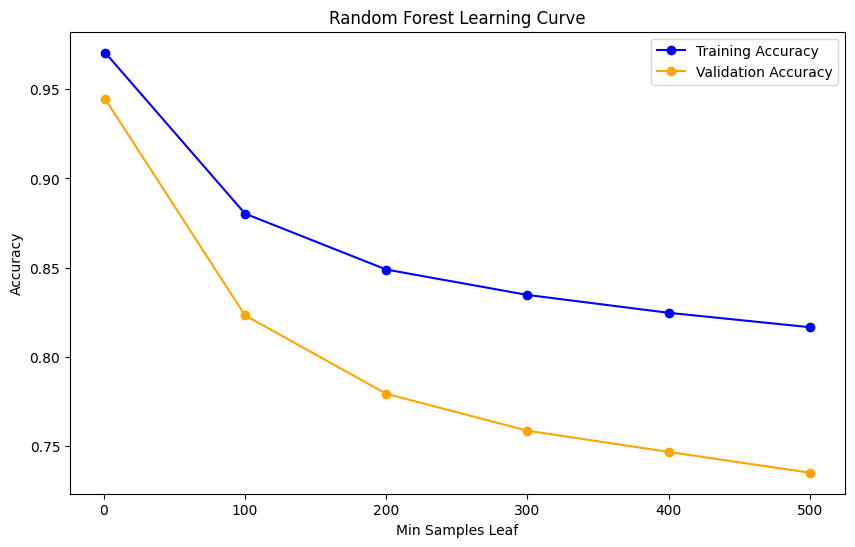

In [68]:
best_accuracy = 0
msl_list = []
train_acc_list = []
val_acc_list = []

for msl in param_grid['min_samples_leaf']:
    msl_list.append(msl)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=4000, min_samples_leaf=msl,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{msl} min samples leaf, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_msl= msl
    
msl_df = pd.DataFrame({'Min Samples Leaf': msl_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

1 min samples leaf, Train Accuracy: 0.9704625383191976, Validation Accuracy: 0.9444721990933481
2 min samples leaf, Train Accuracy: 0.9702021587204599, Validation Accuracy: 0.9434915348320844
3 min samples leaf, Train Accuracy: 0.9699035901139074, Validation Accuracy: 0.9436210565269683
4 min samples leaf, Train Accuracy: 0.9694175481962637, Validation Accuracy: 0.9432509945415857
5 min samples leaf, Train Accuracy: 0.9690807905818963, Validation Accuracy: 0.9433250069386623
6 min samples leaf, Train Accuracy: 0.968417690537111, Validation Accuracy: 0.9420482930890924
7 min samples leaf, Train Accuracy: 0.9679490072593833, Validation Accuracy: 0.9416782311037099
8 min samples leaf, Train Accuracy: 0.9671366229113216, Validation Accuracy: 0.9402349893607179
9 min samples leaf, Train Accuracy: 0.9660812176044382, Validation Accuracy: 0.939513368489222
10 min samples leaf, Train Accuracy: 0.9650119253856222, Validation Accuracy: 0.9374410213710797
11 min samples leaf, Train Accuracy: 0.96

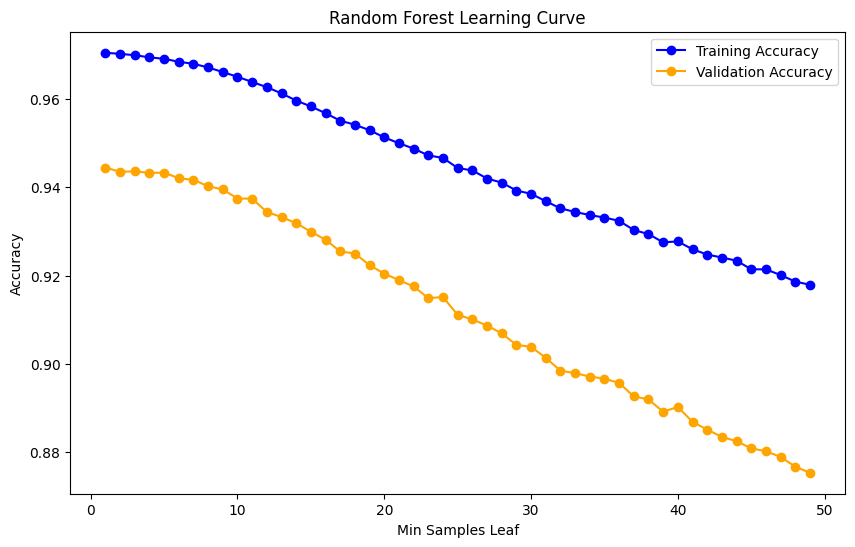

In [69]:
best_accuracy = 0
msl_list = []
train_acc_list = []
val_acc_list = []

for msl in range(1,50):
    msl_list.append(msl)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=4000, min_samples_leaf=msl,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{msl} min samples leaf, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_msl= msl
    
msl_df = pd.DataFrame({'Min Samples Leaf': msl_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(msl_df['Min Samples Leaf'], msl_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [73]:
param_grid = {'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_sample_split': [10, 50, 100, 200],
    'max_leaf_nodes': [2, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000],
    'min_samples_leaf': [1, 100, 200, 300, 400, 500],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    }

0.1 max samples, Train Accuracy: 0.9064924785013244, Validation Accuracy: 0.8601165695253955
0.2 max samples, Train Accuracy: 0.9371061758569093, Validation Accuracy: 0.902100101767046
0.3 max samples, Train Accuracy: 0.9506736888151339, Validation Accuracy: 0.9198075677676011
0.4 max samples, Train Accuracy: 0.9558847525178708, Validation Accuracy: 0.9262281432139884
0.5 max samples, Train Accuracy: 0.9603216208803608, Validation Accuracy: 0.9324636876676843
0.6 max samples, Train Accuracy: 0.9622484299110197, Validation Accuracy: 0.9349245998704783
0.7 max samples, Train Accuracy: 0.9640502567342843, Validation Accuracy: 0.9371264686835045
0.8 max samples, Train Accuracy: 0.9653660416399055, Validation Accuracy: 0.9384586918308817
0.9 max samples, Train Accuracy: 0.9665012966904017, Validation Accuracy: 0.9396243870848368
1 max samples, Train Accuracy: 0.3397641308008235, Validation Accuracy: 0.5081691183273198


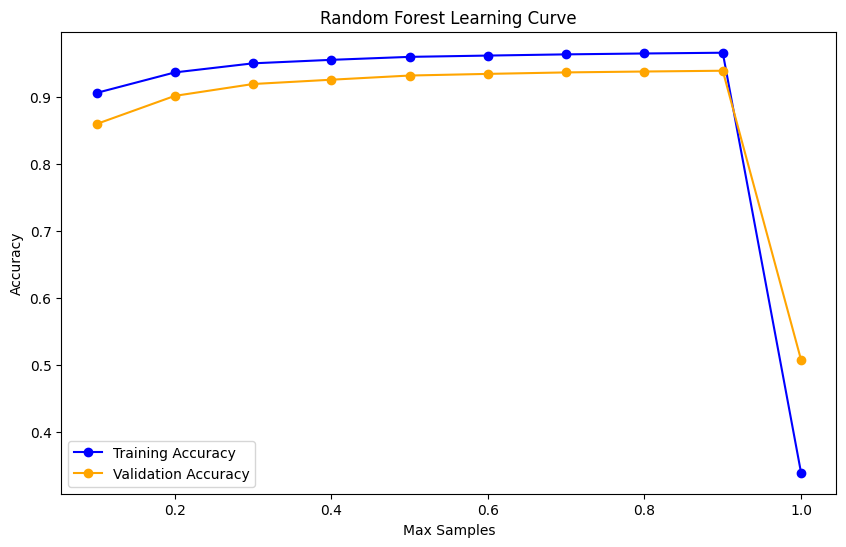

In [74]:
best_accuracy = 0
maxs_list = []
train_acc_list = []
val_acc_list = []

for maxs in param_grid['max_samples']:
    maxs_list.append(maxs)

    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=4000, min_samples_leaf=8, max_samples=maxs,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_accuracy)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_accuracy)

    print(f"{maxs} max samples, Train Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

    if val_accuracy> best_accuracy:
        best_accuracy = accuracy
        best_maxs = maxs
    
maxs_df = pd.DataFrame({'Max Samples': maxs_list,'Train Accuracy': train_acc_list, 'Validation Accuracy': val_acc_list})

plt.figure(figsize=(10, 6))
plt.title('Random Forest Learning Curve')
plt.xlabel('Max Samples')
plt.ylabel('Accuracy')
plt.plot(maxs_df['Max Samples'], maxs_df['Train Accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(maxs_df['Max Samples'], maxs_df['Validation Accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.legend()
plt.show()

In [75]:
    model = RandomForestClassifier(n_estimators=50, max_depth=19, max_features=3, min_samples_split=15,max_leaf_nodes=4000, min_samples_leaf=8, max_samples=0.5,n_jobs=-1, random_state=7)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9603216208803608, Validation Accuracy: 0.9324636876676843, Test Accuracy: 0.9270964399378284


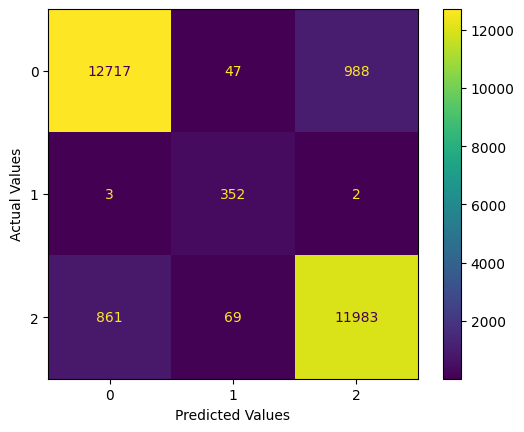

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     13752
           1       0.75      0.99      0.85       357
           2       0.92      0.93      0.93     12913

    accuracy                           0.93     27022
   macro avg       0.87      0.95      0.90     27022
weighted avg       0.93      0.93      0.93     27022



In [78]:
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['0', '1', '2'])

cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_test, y_test_pred))

In [ ]:
#Is my model overfitted?

In [34]:
#REMEMBER TO CHANGE TERMINAL NODES TO LEAF NODES IN THE PARAM GRIDS

[50, 100, 150, 200]

https://github.com/ngoix/scikit-learn/commit/2661da0d3578eda406dcf1867443d9f744165c5f

Use the tuned hyperparameters for a new RF

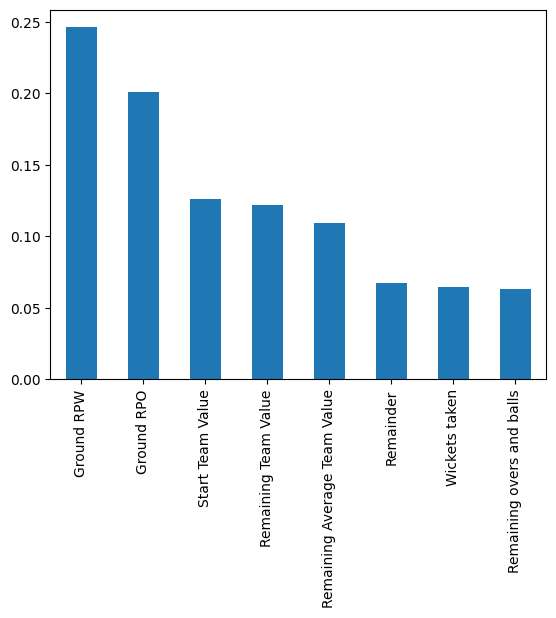

In [79]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
sdfsdf

NameError: name 'sdfsdf' is not defined

https://www.datacamp.com/tutorial/random-forests-classifier-python